In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('weight_height.csv')
df_sampled = df.sample(frac=0.9, random_state=42)
df_remaining = df.drop(df_sampled.index)
df_remaining.shape

(97, 2)

<Axes: xlabel='Weight (kg)', ylabel='Height (m)'>

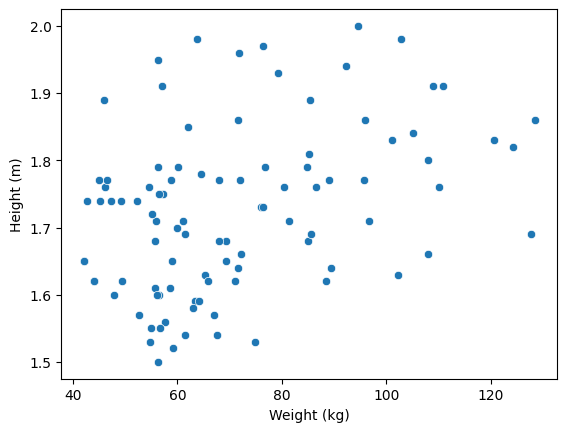

In [8]:
sns.scatterplot(x='Weight (kg)', y='Height (m)', data=df_remaining)

In [9]:
df_remaining['Height (cm)'] = df_remaining['Height (m)'].apply(lambda x : x * 100)
del df_remaining['Height (m)']

In [10]:
# Resetting th index values of the remaing dataframe
df_remaining = df_remaining.reset_index(drop=True)

In [11]:
# Independent feature must be in a dataframe or a 2d array
X = df_remaining[['Weight (kg)']]
print(type(X))
# Dependent feature can be a 1d array or a series
y = df_remaining['Height (cm)']
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [12]:
# Train Test Split
from sklearn.model_selection import train_test_split

# 25% for test data and the remaining for training purpose
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [13]:
# Standardization - Some independent features might have a great value which will take time to compute the gradient therefore required.
# Standardization is a technique to normalize the features so that they are on the same scale
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

In [16]:
# Apply simple Linear Regression 
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)

In [17]:
# Teaching the model on the basis of training data to predict output
model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [18]:
print(f"Coefficient or Slope of the Best-Fit Line : {model.coef_}")   # when unit movement on x-axis, 4.7 unit movement on y-axis
print(f"Intercept of the Best-Fit Line : {model.intercept_}")     

Coefficient or Slope of the Best-Fit Line : [4.73661061]
Intercept of the Best-Fit Line : 173.55555555555554


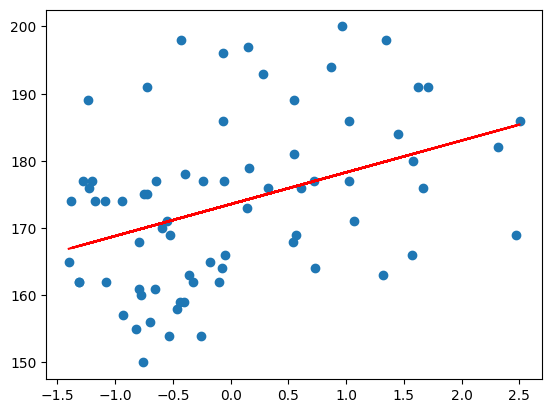

In [19]:
# Ploting the best fit line wrt the training data
plt.scatter(X_train,y_train)
#plt.xlim(0,max(X_train))  #optional
plt.plot(X_train, model.predict(X_train), color='red')        # best_fit_line = model.predict(X_train)

How the prediction is done?

predicted_height_output = intercept + coef_(Weight)
( y = mx + b )

y_pred = 4.73*(X_test) + 173.5

In [20]:
# Predict for the test data
y_pred = model.predict(X_test)
# Print the predicted values
y_pred

array([183.73558051, 166.89697909, 179.55274322, 170.54355519,
       170.52210475, 176.0348698 , 172.45264504, 169.92149221,
       170.75805967, 173.93272593, 169.68553729, 172.21669011,
       172.73150086, 174.1472304 , 169.57828505, 175.32700503,
       169.85714087, 169.92149221, 170.02874445, 169.5997355 ,
       171.16561818, 169.98584355, 176.84998681, 167.56194297,
       168.11965461])

In [21]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.2f}')
print(f'MAE : {mae:.2f}')
print(f'RMSE : {rmse:.2f}')

MSE : 123.15
MAE : 8.84
RMSE : 11.10


In [22]:
# R- square
from sklearn.metrics import r2_score
r_sqr_score = r2_score(y_test,y_pred)
print(f'R-Square Score : {r_sqr_score}')

R-Square Score : 0.010123344759215946


In [103]:
# Adjusted R-square
adjusted_r2 = 1 - (1 - r_sqr_score)*(len(y_test)-1)/ (len(y_test) - X_test.shape[1]-1)
print(f"Adjusted R-square: {adjusted_r2}")

Adjusted R-square: -0.032914770686035544


In [23]:
# Analysing the predicted data and actual data in a dataframe
results = pd.DataFrame({
    'X_test' : X_test.flatten() if X_test.ndim == 2 else X_test,
    'Actual_Value' : y_test,
    'Predicted_Value' : y_pred
})

results.head()

,X_test,Actual_Value,Predicted_Value
62,2.149221,183.0,183.735581
40,-1.405768,165.0,166.896979
93,1.266135,183.0,179.552743
18,-0.635898,152.0,170.543555
81,-0.640426,165.0,170.522105


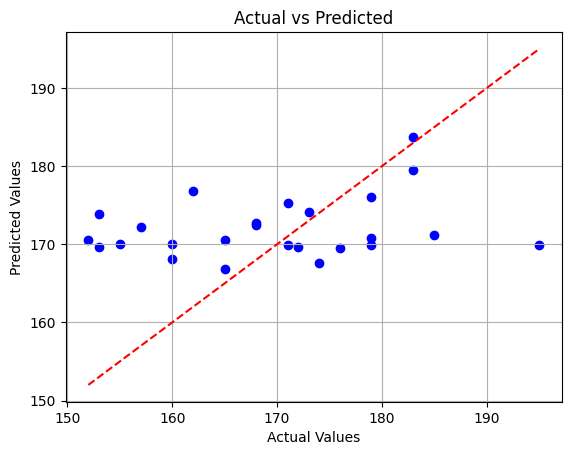

In [24]:
# Visualising the pridicted and actual data via plot
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # perfect line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()

#If the points lie on or near this red line, your model’s predictions are very accurate.
#If they’re far from the line, it shows errors.

In [25]:
# OLS Linear regression
import statsmodels.api as sm

ols_model = sm.OLS(y_train, X_train).fit()
prediction = ols_model.predict(X_test)
print(prediction)
print(ols_model.summary())

[10.18002496 -6.65857647  5.99718766 -3.01200036 -3.03345081  2.47931424
 -1.10291052 -3.63406334 -2.79749588  0.37717037 -3.87001827 -1.33886544
 -0.8240547   0.59167485 -3.97727051  1.77144947 -3.69841469 -3.63406334
 -3.52681111 -3.95582006 -2.38993738 -3.569712    3.29443126 -5.99361259
 -5.43590095]
                                 OLS Regression Results                                
Dep. Variable:            Height (cm)   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.013
Method:                 Least Squares   F-statistic:                            0.05266
Date:                Mon, 14 Apr 2025   Prob (F-statistic):                       0.819
Time:                        21:21:32   Log-Likelihood:                         -473.59
No. Observations:                  72   AIC:                                      949.2
Df Residuals:                      71   BIC:                                  

In [26]:
# Prediction for New data 
model.predict(scaler.transform([[73]]))

e:\padhai ka saman\python\machine_learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([173.52516742])

In [27]:
model.predict(scaler.transform([[80]]))

e:\padhai ka saman\python\machine_learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([175.02669876])